<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data.xlsx'

In [5]:
df = pd.read_excel(path)
df.head()

,Customer ID,Age,Gender,Total Spent,Converted,Comments
0,1,23,F,150,1,Satisfied with the service
1,2,35,M,600,1,Needs improvement in delivery
2,3,45,F,800,0,Regular customer
3,4,52,M,200,0,Occasional buyer
4,5,29,F,300,1,High spender


In [6]:
print(df.describe())

       Customer ID        Age  Total Spent  Converted
count    15.000000  15.000000    15.000000  15.000000
mean      8.000000  36.866667   444.666667   0.600000
std       4.472136   9.179688   214.405046   0.507093
min       1.000000  23.000000   120.000000   0.000000
25%       4.500000  30.500000   295.000000   0.000000
50%       8.000000  36.000000   450.000000   1.000000
75%      11.500000  43.000000   605.000000   1.000000
max      15.000000  52.000000   800.000000   1.000000


In [9]:
average_total_spent = df.groupby('Customer ID')['Total Spent'].mean()
print(average_total_spent)

Customer ID
1     150.0
2     600.0
3     800.0
4     200.0
5     300.0
6     450.0
7     670.0
8     120.0
9     500.0
10    750.0
11    610.0
12    290.0
13    400.0
14    320.0
15    510.0
Name: Total Spent, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


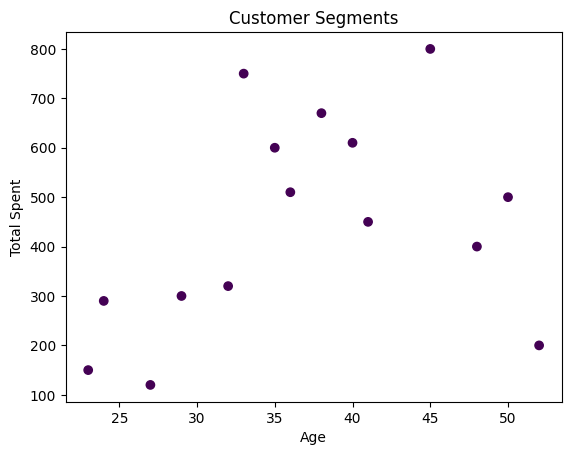

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Age', 'Total Spent', 'Converted']]

kmeans = KMeans(n_clusters=1)
df['Segment'] = kmeans.fit_predict(X)

plt.scatter(df['Age'], df['Total Spent'], c=df['Segment'])
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.title('Customer Segments')
plt.show()

In [17]:
from scipy import stats

group_a = df[df['Converted'] == 'A']['Converted']
group_b = df[df['Total Spent'] == 'B']['Converted']

t_stat, p_value = stats.ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

conversion_rate_A = np.mean(group_A)
conversion_rate_B = np.mean(group_B)

labels = ['Group A', 'Group B']
conversion_rates = [conversion_rate_A, conversion_rate_B]

plt.bar(labels, conversion_rates, color= ['blue, green'])
plt.ylabel('Conversion Rate')
plt.title('A/B Test conversion Rates')
plt.show()

NameError: name 'group_A' is not defined